## Clustering the review data from the train into 2 clusters and comapring the output with the given one

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle
filename = '4000reviews_preprocessed.csv'
infile = open(filename,'rb')
review3000_dt = pickle.load(infile)
infile.close()

In [88]:
review3000_dt['sentiment'] = review3000_dt['sentiment'].replace({0:1, 1:0})


In [89]:
review3000_dt.head()

,review,sentiment,review_processed_1
0,It was just as good as the original. The anima...,1,good original animal magnificent took daughter...
1,They stayed true to the cartoon except for the...,1,stayed true cartoon except part hyena teased s...
2,It was a great movie! It was great at conveyi...,1,great movie great conveying story
3,"It was very realistic, very engaging and enter...",1,realistic engaging entertaining kept completel...
4,Just like the original but with awesome humor ...,1,like original awesome humor best watch fabulous


In [90]:
review3000_dt.tail()

,review,sentiment,review_processed_1
2995,Nada como la original,0,nada como original
2996,The benefit this film has is that its followin...,0,benefit film following story already good fami...
2997,Its ok. I liked it more than the original. But...,0,liked original liked aladdin remake better
2998,Left out three iconic lines while including ot...,0,left three iconic line including others great
2999,"It was very flat and boring \nI love Beyonce, ...",0,flat boring love beyonce voice made wanna scre...


In [108]:
train_x, train_y = train_test_split(review3000_dt,test_size=0.20)

In [91]:
X_train,X_test,y_train,y_test= train_test_split(review3000_dt.review_processed_1,review3000_dt.sentiment,test_size=0.20)


In [92]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english",strip_accents="unicode",decode_error="ignore")
cv_train_r1 = cv.fit_transform(X_train)
cv_test_r1 = cv.transform(X_test)

In [93]:
X_train.index

Int64Index([1305, 2235,  558, 1686, 1037,  396,  803,  993,  864, 2229,
            ...
            1061, 2000,  828, 1240,  375,   47,  272, 2754, 1660,  530],
           dtype='int64', length=2400)

In [94]:


#number of clusters and also we are assigning this "KMeans" function to object kmeans 
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=100,random_state=232116)
#fitting the input data; it itteratively finds the centroid value 
kmeans = kmeans.fit(cv_train_r1)
#getting the cluster labels; labels the 2 cluster
labels = kmeans.predict(cv_train_r1)
#centriod values computes an array of values
centroids = kmeans.cluster_centers_

In [95]:
centroids

array([[0.        , 0.        , 0.03478261, ..., 0.00869565, 0.        ,
        0.00869565],
       [0.00043764, 0.00087527, 0.00437637, ..., 0.00087527, 0.00043764,
        0.00043764]])

In [96]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
true_test_labels = ['pos','neg']


In [98]:
labels_test = kmeans.predict(cv_test_r1)

predicted_labels_knn = modelknn.predict(cv_test_r1)

In [99]:
wss = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(cv_train_r1)
    #clusters = kmeans.labels_
    wss[k] = kmeans.inertia_
    #inertia:summ of squared distances of samples to their closest cluster center

In [100]:
wss

{1: 32781.177083333336,
 2: 31085.64605263161,
 3: 30126.210824204674,
 4: 29416.241763008198,
 5: 29047.261466010626,
 6: 28611.781182090675,
 7: 28202.446616290526,
 8: 27972.4455416735,
 9: 27752.689593134837}

<function matplotlib.pyplot.show(*args, **kw)>

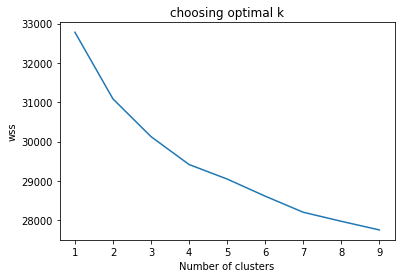

In [101]:
plt.figure()
plt.plot(list(wss.keys()),list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("wss")
plt.title("choosing optimal k")
plt.show

## comparision of the predicted text with original text and labeling them with postive and negative

In [104]:
print ("\nBelow 3 sentences will be predicted against the learned nieghbourhood and learned clusters:\n1. ",\
review3000_dt.review_processed_1[0],"\n2. ",review3000_dt.review_processed_1[1],"\n3. ",review3000_dt.review_processed_1[2])
print("\n-------------------------------PREDICTIONS BY KNN------------------------------------------")
print ("\n",review3000_dt.review_processed_1[0],":",true_test_labels[np.int(labels_test[0])],\
"\n",review3000_dt.review_processed_1[1],":",true_test_labels[np.int(labels_test[1])],\
"\n",review3000_dt.review_processed_1[2],":",true_test_labels[np.int(labels_test[2])])
 



Below 3 sentences will be predicted against the learned nieghbourhood and learned clusters:
1.  good original animal magnificent took daughter cried movie opening scene closing scene circle life moving year mufasas death seemed gutwretching time around negative missed whoppi goldberg crazy hyena 
2.  stayed true cartoon except part hyena teased saying hearing name mufasa part cartoon best scene included great movie 
3.  great movie great conveying story

-------------------------------PREDICTIONS BY KNN------------------------------------------

 good original animal magnificent took daughter cried movie opening scene closing scene circle life moving year mufasas death seemed gutwretching time around negative missed whoppi goldberg crazy hyena : pos 
 stayed true cartoon except part hyena teased saying hearing name mufasa part cartoon best scene included great movie : neg 
 great movie great conveying story : neg


In [107]:
import collections

collections.Counter(labels)

Counter({1: 2285, 0: 115})

In [110]:
train_x.sentiment.value_counts()

1    1527
0     873
Name: sentiment, dtype: int64

## Here clustering couldn't actually preddict the two clusters properly
  ## As we can see that out of 873 negative records it only preddicted 115 records which is very poor approach.
  

### 1. Therefore clustering cannot classify the data properly. 